# Moloco DS test

Hi, I will make my code as readable as possible.

In [4]:
import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

In [173]:
df = pd.read_csv('Adops & Data Scientist Sample Data - Q1 Analytics.csv')
df.shape

(3553, 4)

Let's take a look at the actual data, how it looks like, and some basic information...

In [174]:
df.head()

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G


In [175]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3553 entries, 0 to 3552
Data columns (total 4 columns):
ts            3553 non-null object
user_id       3553 non-null object
country_id    3553 non-null object
site_id       3553 non-null object
dtypes: object(4)
memory usage: 111.2+ KB


Check for missing values and duplicate rows:

In [178]:
df.isnull().any()

ts            False
user_id       False
country_id    False
site_id       False
dtype: bool

## Question 1 

Consider only the rows with country_id = "BDV" (there are 844 such rows). For each site_id, we can compute the number of unique user_id's found in these 844 rows. Which site_id has the largest number of unique users? And what's the number?

In [181]:
# First we select the requested subset
df_1 = df[df['country_id'] == "BDV"]
df_1

,ts,user_id,country_id,site_id
13,2019-02-01 00:47:58,LC3C22,BDV,N0OTG
32,2019-02-01 02:46:15,LC375A,BDV,5NPAU
87,2019-02-01 06:44:42,LC392E,BDV,N0OTG
88,2019-02-01 07:36:56,LC3FAE,BDV,5NPAU
94,2019-02-01 08:58:35,LC3AFF,BDV,3POLC
...,...,...,...,...
3521,2019-02-07 22:18:59,LC3ECF,BDV,5NPAU
3525,2019-02-07 22:26:28,LC3D63,BDV,5NPAU
3526,2019-02-07 22:27:29,LC3005,BDV,5NPAU
3530,2019-02-07 22:57:34,LC3C51,BDV,5NPAU


In [182]:
# We group by 'site_id', take the user_id's and count the unique values
unq_cnts = df_1.groupby('site_id')['user_id'].nunique()
unq_cnts

site_id
3POLC      2
5NPAU    544
N0OTG     90
Name: user_id, dtype: int64

**ANSWER:** The site with site_id = '5NPAU' has the largest number of unique users. 

Just out of curiosity, I would like to check if the sum of unq_cnts and the total number of unique users coincide:

In [24]:
df_1['user_id'].nunique()

623

In [33]:
unq_cnts.sum()

636

They do not! The number of unique users altogether (623) has to be smaller or equal to the sum of unique users in each site (636), as a same user can visit multiple sites and hence count more than once in the sum of unq_cnts. Which users are those that visited more than one site?

In [183]:
# A simple approach, as the dataset is small...

s1 = set(df_1[df_1['site_id'] == '5NPAU']['user_id'])
s2 = set(df_1[df_1['site_id'] == '3POLC']['user_id'])
s3 = set(df_1[df_1['site_id'] == 'N0OTG']['user_id'])

print((s3.intersection(s1)))
print()
print(s2.intersection(s1))
print()
print(s2.intersection(s3))

{'LC2C3A', 'LC3A32', 'LCC363', 'LC3A60', 'LC3A6C', 'LC399D', 'LC32C4', 'LC39F9', 'LC33F1', 'LC37DC', 'LC3A3B', 'LC3331', 'LC3201'}

set()

set()


In [45]:
print('There are', len((s3.intersection(s1))) ,"users who visited '5NPAU' and 'N0OTG'")

There are 13 users who visited '5NPAU' and 'N0OTG'


which coincides with the difference 636 - 623

## Question 2

Between 2019-02-03 00:00:00 and 2019-02-04 23:59:59, there are four users who visited a certain site more than 10 times. Find these four users & which sites they (each) visited more than 10 times. (Simply provides four triples in the form (user_id, site_id, number of visits) in the box below.)

In [184]:
# First I will convert the timestams to datetime
df['ts'] = pd.to_datetime(df['ts'])
df['ts']

0      2019-02-01 00:01:24
1      2019-02-01 00:10:19
2      2019-02-01 00:21:50
3      2019-02-01 00:22:50
4      2019-02-01 00:23:44
               ...        
3548   2019-02-07 23:56:57
3549   2019-02-07 23:58:36
3550   2019-02-07 23:58:56
3551   2019-02-07 23:59:19
3552   2019-02-07 23:59:37
Name: ts, Length: 3553, dtype: datetime64[ns]

In [185]:
df_2 = df[(df['ts'] >= '2019-02-03 00:00:00') & (df['ts'] <= '2019-02-04 23:59:59')]
df_2

,ts,user_id,country_id,site_id
1049,2019-02-03 00:02:31,LC3C7E,TL6,3POLC
1050,2019-02-03 00:03:09,LC3C7E,TL6,3POLC
1051,2019-02-03 00:03:46,LC3C7E,TL6,3POLC
1052,2019-02-03 00:04:12,LC3C7E,TL6,3POLC
1053,2019-02-03 00:04:25,LC3C7E,TL6,3POLC
...,...,...,...,...
2075,2019-02-04 23:54:56,LC34B0,XA7,N0OTG
2076,2019-02-04 23:55:46,LC3DEA,TL6,N0OTG
2077,2019-02-04 23:56:12,LC06C3,TL6,N0OTG
2078,2019-02-04 23:56:54,LC06C3,TL6,N0OTG


In [186]:
# A simple approach: group by ['user_id', 'site_id']  and check the size.
# We finally pick those with more than 10 counts.

ans = df_2.groupby(['user_id', 'site_id']).size()
ans[ans > 10]

user_id  site_id
LC06C3   N0OTG      25
LC3A59   N0OTG      26
LC3C7E   3POLC      15
LC3C9D   N0OTG      17
dtype: int64

## Question 3

For each site, compute the unique number of users whose last visit (found in the original data set) was to that site. For instance, user "LC3561"'s last visit is to "N0OTG" based on timestamp data. Based on this measure, what are top three sites? (hint: site "3POLC" is ranked at 5th with 28 users whose last visit in the data set was to 3POLC; simply provide three pairs in the form (site_id, number of users).)

In [187]:
# We first group the timestampsby users_id, and then simply take the last one (with max()). T
# This way we get the unique combinations [user_id, last_visit]
keys = df.groupby(['user_id']).ts.max()
keys

user_id
LC00C3   2019-02-03 18:52:50
LC01C3   2019-02-04 11:35:10
LC05C3   2019-02-02 14:14:44
LC06C3   2019-02-07 01:16:12
LC07C3   2019-02-05 19:06:42
                 ...        
LCFC3B   2019-02-05 04:53:03
LCFC3D   2019-02-01 18:59:50
LCFC3E   2019-02-01 20:49:13
LCFEC3   2019-02-07 06:23:59
LCFFC3   2019-02-05 03:31:17
Name: ts, Length: 1916, dtype: datetime64[ns]

In [188]:
# Merge the above results with the df to get the rest of columns
df_3 = pd.merge(df, keys.reset_index())
df_3

,ts,user_id,country_id,site_id
0,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
1,2019-02-01 00:21:50,LC3500,TL6,N0OTG
2,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
3,2019-02-01 00:41:50,LCC3C3,QLT,5NPAU
4,2019-02-01 00:42:13,LC39C8,TL6,QGO3G
...,...,...,...,...
1911,2019-02-07 23:44:34,LC3561,TL6,N0OTG
1912,2019-02-07 23:55:07,LC3837,TL6,RT9Z6
1913,2019-02-07 23:56:57,LC3F13,TL6,QGO3G
1914,2019-02-07 23:58:56,LC35EB,TL6,QGO3G


In [189]:
# Finally we just group by 'site_id', compute the size of the groups and sort.
df_3.groupby('site_id').size().sort_values(ascending = False)

site_id
5NPAU    992
N0OTG    561
QGO3G    289
GVOFK     42
3POLC     28
RT9Z6      2
JSUUP      1
EUZ/Q      1
dtype: int64

## Question 4

For each user, determine the first site he/she visited and the last site he/she visited based on the timestamp data. Compute the number of users whose first/last visits are to the same website. What is the number?

**ANSWER:** My approach will be the following: I construct two df with the first and last visited sites for each unique user. Then merge them and check how many users have the same first and last visited site.

In [167]:
# For the last visits, we can use the previous results
df_3

,ts,user_id,country_id,site_id
0,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
1,2019-02-01 00:21:50,LC3500,TL6,N0OTG
2,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
3,2019-02-01 00:41:50,LCC3C3,QLT,5NPAU
4,2019-02-01 00:42:13,LC39C8,TL6,QGO3G
...,...,...,...,...
1911,2019-02-07 23:44:34,LC3561,TL6,N0OTG
1912,2019-02-07 23:55:07,LC3837,TL6,RT9Z6
1913,2019-02-07 23:56:57,LC3F13,TL6,QGO3G
1914,2019-02-07 23:58:56,LC35EB,TL6,QGO3G


In [191]:
# For their first visit:

keysMin = df.groupby(['user_id']).ts.min()
df_min = pd.merge(df, keysMin.reset_index())
df_min

,ts,user_id,country_id,site_id
0,2019-02-01 00:01:24,LC36FC,TL6,N0OTG
1,2019-02-01 00:10:19,LC39B6,TL6,N0OTG
2,2019-02-01 00:21:50,LC3500,TL6,N0OTG
3,2019-02-01 00:22:50,LC374F,TL6,N0OTG
4,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G
...,...,...,...,...
1911,2019-02-07 23:39:33,LC34C6,HVQ,GVOFK
1912,2019-02-07 23:41:25,LCC36A,TL6,N0OTG
1913,2019-02-07 23:42:35,LC34B8,TL6,QGO3G
1914,2019-02-07 23:56:57,LC3F13,TL6,QGO3G


In [192]:
df_4 = pd.merge(df_3, df_min, on = 'user_id' )
df_4

,ts_x,user_id,country_id_x,site_id_x,ts_y,country_id_y,site_id_y
0,2019-02-01 00:10:19,LC39B6,TL6,N0OTG,2019-02-01 00:10:19,TL6,N0OTG
1,2019-02-01 00:21:50,LC3500,TL6,N0OTG,2019-02-01 00:21:50,TL6,N0OTG
2,2019-02-01 00:23:44,LCC1C3,TL6,QGO3G,2019-02-01 00:23:44,TL6,QGO3G
3,2019-02-01 00:41:50,LCC3C3,QLT,5NPAU,2019-02-01 00:41:50,QLT,5NPAU
4,2019-02-01 00:42:13,LC39C8,TL6,QGO3G,2019-02-01 00:42:13,TL6,QGO3G
...,...,...,...,...,...,...,...
1911,2019-02-07 23:44:34,LC3561,TL6,N0OTG,2019-02-01 00:25:29,TL6,3POLC
1912,2019-02-07 23:55:07,LC3837,TL6,RT9Z6,2019-02-03 03:30:25,QLT,5NPAU
1913,2019-02-07 23:56:57,LC3F13,TL6,QGO3G,2019-02-07 23:56:57,TL6,QGO3G
1914,2019-02-07 23:58:56,LC35EB,TL6,QGO3G,2019-02-07 23:58:56,TL6,QGO3G


Finally we just check how many entries have the same first and last site_id:

In [193]:
df_4[df_4['site_id_y'] == df_4['site_id_x'] ].shape

(1670, 7)

**ANSWER**: There are 1670 users whose first and last visit were to the same site

# Second part of the test

So, if I understood correctly I should find a good model for the provided data WITHOUT using any ML library, but just by analysing the data and drawing conclusions. 

I will start by exploring the data making plots and inferring relationships among the 2 features and the target variable C, and then enlarge the feature space to consider order 2 polynomials. Finally I will implement a gradient descent algorithm for fitting the data.

In [5]:
df_reg = pd.read_csv('Adops & Data Scientist Sample Data - Q2 Regression.csv', header = None,names=['A', 'B', 'C'])
df_reg

,A,B,C
0,0.490,-0.180,11.50
1,-1.410,-1.230,11.80
2,0.943,4.510,-3.24
3,3.570,5.070,-23.90
4,-1.700,6.910,-22.10
...,...,...,...
295,6.920,-0.421,33.20
296,11.700,-1.290,108.00
297,9.920,3.690,-126.00
298,11.400,6.290,-315.00


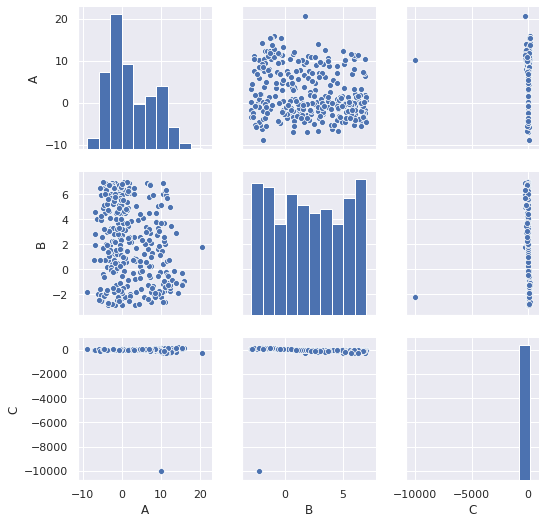

In [6]:
sns.pairplot(df_reg)

There seems to be a huge outlier. I will get rid of it

In [7]:
df_reg = df_reg[ (df_reg.C.mean() + 2* df_reg.C.std() > df_reg['C']) & (df_reg['C'] > df_reg.C.mean() - 2*df_reg.C.std())]

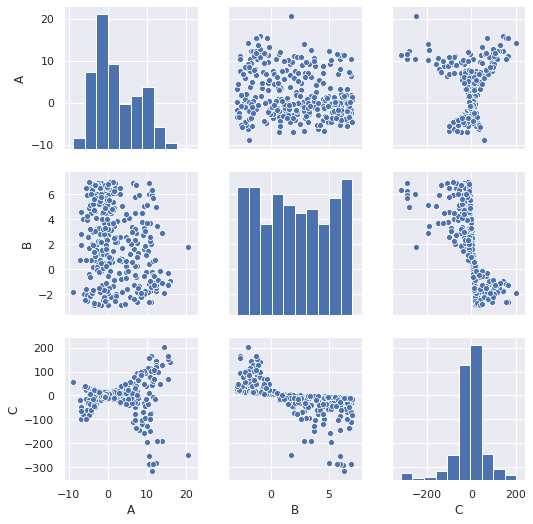

In [8]:
sns.pairplot(df_reg)

* A and B seems to be independent indeed
* The relatitionship of A and B with C is not simply linear

In [12]:
df_reg['A2'] = df_reg['A']**2
df_reg['B2'] = df_reg['B']**2
df_reg['AB'] = df_reg['A'] * df_reg['B']

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

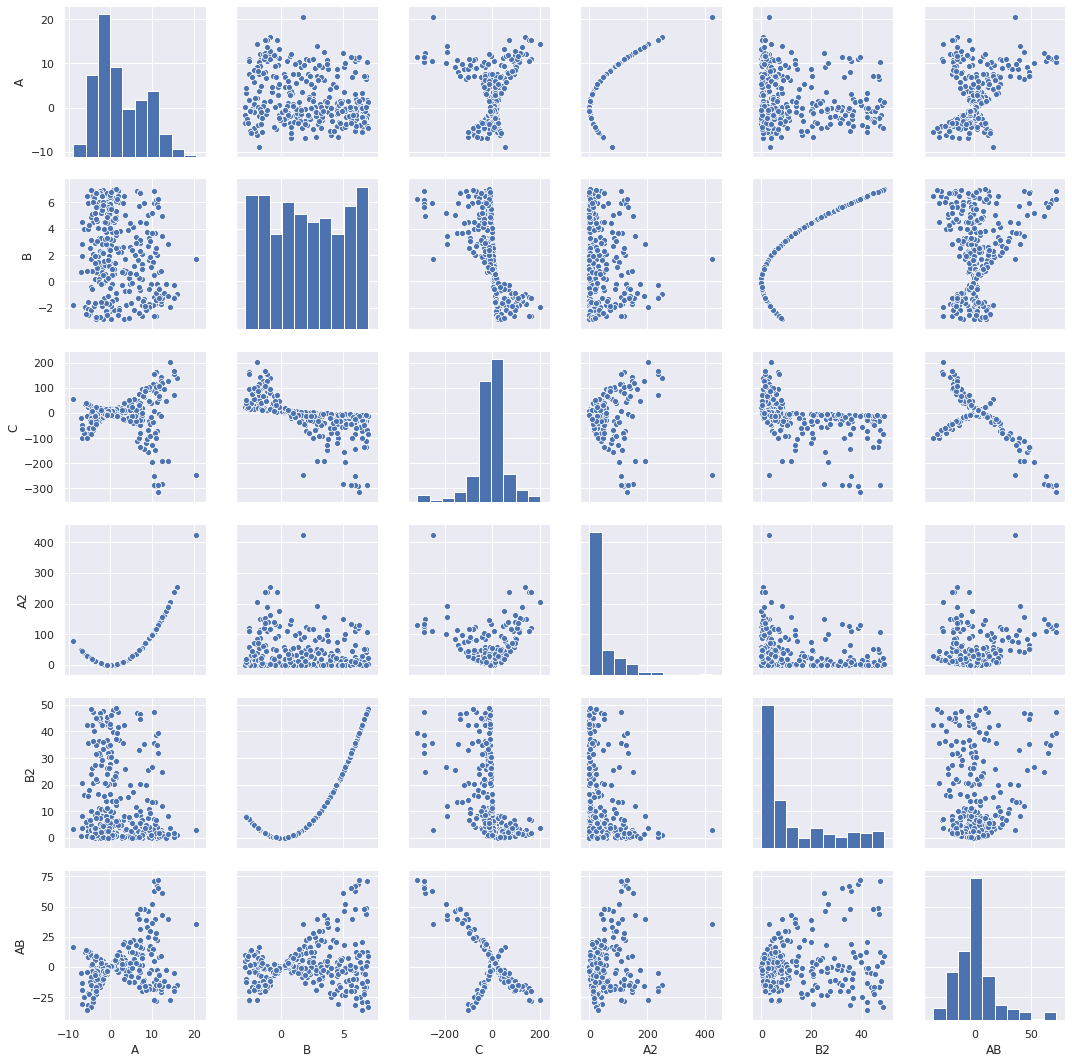

In [14]:
sns.pairplot(df_reg)

Some interesting relatitionships emerges between 'AB' and 'C'... seems that the two 'lines that emerge in the pairplot('AB', 'C') is due to the effect of some absolute value function applied on either A^2 or B^2. Lets check both:  

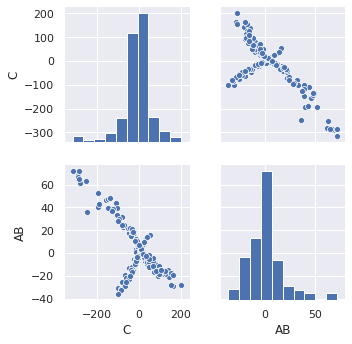

In [167]:
sns.pairplot(df_reg[['C', 'AB']])

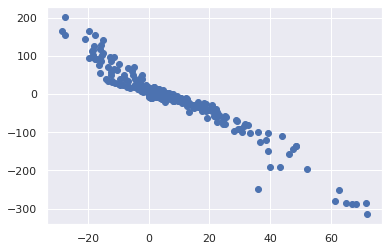

In [171]:
plt.plot( abs(df_reg['A']) * df_reg['B'], df_reg['C'], 'o')

There we go! However the relationship seems not linear;

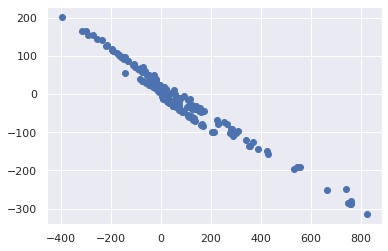

In [172]:
plt.plot( df_reg['A']**2 * df_reg['B'] + df_reg['B'], df_reg['C'], 'o')

This curve can be well approximated by a line of the form:

$C = a_1 \cdot A^2B + a_2$

Although other values for the exponent may fit the function even better

Apparently I am not supposed to use any ML library to perform this linear regression. So I can either compute ir by myself, or give some approximate values by eye. I am tempted to do the latter. By taking a look at the plot above, I can read off these values for the coefficients:

In [175]:
a1 = -100/200
a2 = 10

which results in the following plots:

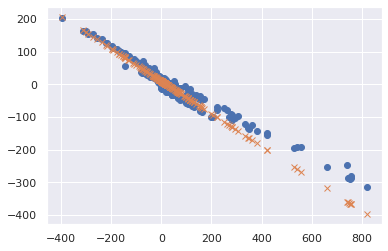

In [178]:
plt.plot( df_reg['A']**2 * df_reg['B'], df_reg['C'], 'o')
plt.plot( df_reg['A']**2 * df_reg['B'], a1 * df_reg['A']**2 * df_reg['B'] + a2, 'x')

Let's be more rigorous and compute the actual values for the fitting parameters. I will enlarge the feature space and the use linear regression for fitting, using gradient descent:

In [179]:
df_reg['A2B'] = df_reg['A']**2 * df_reg['B']
df_reg['A2B2'] = df_reg['A']**2 * df_reg['B']**2
df_reg['AB2'] = df_reg['A'] * df_reg['B']**2
df_reg

/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/home/matias/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,A,B,C,A2,B2,AB,A2B,A2B2,AB2
0,0.490,-0.180,11.50,0.240100,0.032400,-0.08820,-0.043218,0.007779,0.015876
1,-1.410,-1.230,11.80,1.988100,1.512900,1.73430,-2.445363,3.007796,-2.133189
2,0.943,4.510,-3.24,0.889249,20.340100,4.25293,4.010513,18.087414,19.180714
3,3.570,5.070,-23.90,12.744900,25.704900,18.09990,64.616643,327.606380,91.766493
4,-1.700,6.910,-22.10,2.890000,47.748100,-11.74700,19.969900,137.992009,-81.171770
...,...,...,...,...,...,...,...,...,...
295,6.920,-0.421,33.20,47.886400,0.177241,-2.91332,-20.160174,8.487433,1.226508
296,11.700,-1.290,108.00,136.890000,1.664100,-15.09300,-176.588100,227.798649,19.469970
297,9.920,3.690,-126.00,98.406400,13.616100,36.60480,363.119616,1339.911383,135.071712
298,11.400,6.290,-315.00,129.960000,39.564100,71.70600,817.448400,5141.750436,451.030740


In [184]:
df_reg.columns

Index(['A', 'B', 'C', 'A2', 'B2', 'AB', 'A2B', 'A2B2', 'AB2'], dtype='object')

Initial cost is:  695502.930044313 

Optimal parameters are: 
 [[ 0.98483728]
 [ 0.9596548 ]
 [ 0.73665871]
 [ 0.14924143]
 [-0.18365061]
 [ 0.55218569]
 [-0.47807849]
 [ 0.00467841]
 [-0.03874129]] 

Final cost is:  [33.07688244]


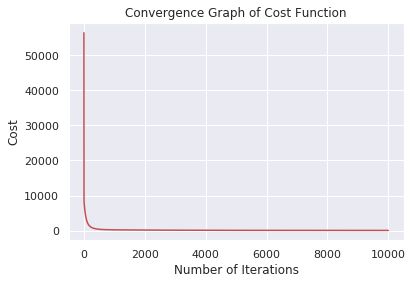

In [205]:

X = df_reg[['A', 'B', 'A2', 'B2', 'AB', 'A2B', 'A2B2', 'AB2']].values
y = df_reg['C'].values[:,np.newaxis]
n_samples = len(y)

X = np.hstack((np.ones((n_samples,1)),X))
n_features = np.size(X,1)
X = X
params = np.ones((n_features,1))

def compute_cost(X, y, params):
    n_samples = len(y)
    h = X @ params
    return (1/(2*n_samples))*np.sum((h-y)**2)

def gradient_descent(X, y, params, learning_rate, n_iters):
    n_samples = len(y)
    J_history = np.zeros((n_iters,1))

    for i in range(n_iters):
        params = params - (learning_rate/n_samples) * X.T @ (X @ params - y) 
        J_history[i] = compute_cost(X, y, params)

    return (J_history, params)

n_iters = 10000
learning_rate = 0.000001

initial_cost = compute_cost(X, y, params)

print("Initial cost is: ", initial_cost, "\n")

(J_history, optimal_params) = gradient_descent(X, y, params, learning_rate, n_iters)

print("Optimal parameters are: \n", optimal_params, "\n")

print("Final cost is: ", J_history[-1])

plt.plot(range(len(J_history)), J_history, 'r')

plt.title("Convergence Graph of Cost Function")
plt.xlabel("Number of Iterations")
plt.ylabel("Cost")
plt.show()

The cost is quite small :) 
Take a look at the projections:

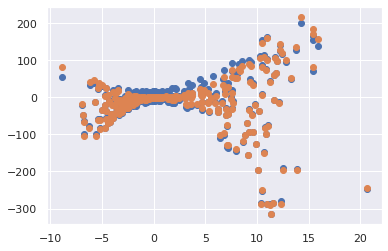

In [213]:
plt.plot( df_reg['A'], df_reg['C'], 'o')
plt.plot( df_reg['A'], X @ optimal_params, 'o')

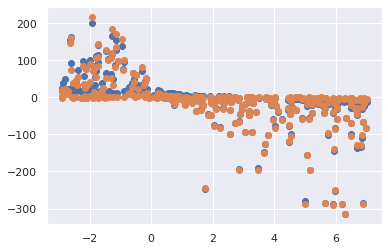

In [214]:
plt.plot( df_reg['B'], df_reg['C'], 'o')
plt.plot( df_reg['B'], X @ optimal_params, 'o')